In [43]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Preparation

In [44]:
# Load in datasets
# Conversation information
df = pd.read_csv('wrangled_full_db_conversations_final.csv')
print('Conversation information:')
display(df.head())

# Database
conn = sqlite3.connect('full_conversation_database.db')
conv_df = pd.read_sql('SELECT * FROM tweets', conn)
print('Conversation database: ')
display(conv_df.head())

,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved
0,5,"[(747530773037780992, 31132554), (747526794446...",2,"[747526794446802944, 747530773037780992]","[22873368, 31132554]",['No airlines involved']
1,6,"[(747530681509625860, 417945325), (74745123859...",2,"[747451238598475776, 747530681509625860]","[55904765, 417945325]",['No airlines involved']
2,11,"[(747530531475173376, 597673831), (74752831114...",2,"[747528311144734720, 747530531475173376]","[427951650, 597673831]",['No airlines involved']
3,12,"[(747530509098450944, 1624311463), (7475297117...",2,"[747529711782244352, 747530509098450944]","[1624311463, 1624311463]",['No airlines involved']
4,14,"[(747530348561571840, 154605692), (74752081839...",2,"[747520818398232576, 747530348561571840]","[117754884, 154605692]",['No airlines involved']


,id_str,text,lang,created_at,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,"('user', 'id_str')"
0,780682646854787072,@johnnymowlem @VirginAtlantic @IMSA @BAR1Motor...,en,Tue Sep 27 08:17:02 +0000 2016,7.806784e+17,107695463.0,johnnymowlem,224166213
1,780682647429414912,RT @JulieThoin: L'audience reprend. Examen du ...,fr,Tue Sep 27 08:17:02 +0000 2016,NaN,NaN,None,41935535
2,780682655104991232,Flew into Gatwick last night. 5 hour drive nor...,en,Tue Sep 27 08:17:04 +0000 2016,7.806784e+17,165883353.0,gforsterphoto,220691420
3,780682685761093632,"👎🏼 what is with Italy...#nopassport control, I...",en,Tue Sep 27 08:17:11 +0000 2016,NaN,NaN,None,27716236
4,780682727993507840,Qqun a déjà voyagé avec RyanAir ici ?,fr,Tue Sep 27 08:17:21 +0000 2016,NaN,NaN,None,3315690130


## EDA

In [45]:
df['conversation_length'].value_counts().sort_index()

2     316059
3      72506
4      27504
5       7603
6       3195
7       1011
8        448
9        150
10        76
11        40
12        17
13         4
14         1
15         6
16         3
17         1
19         1
20         2
Name: conversation_length, dtype: int64

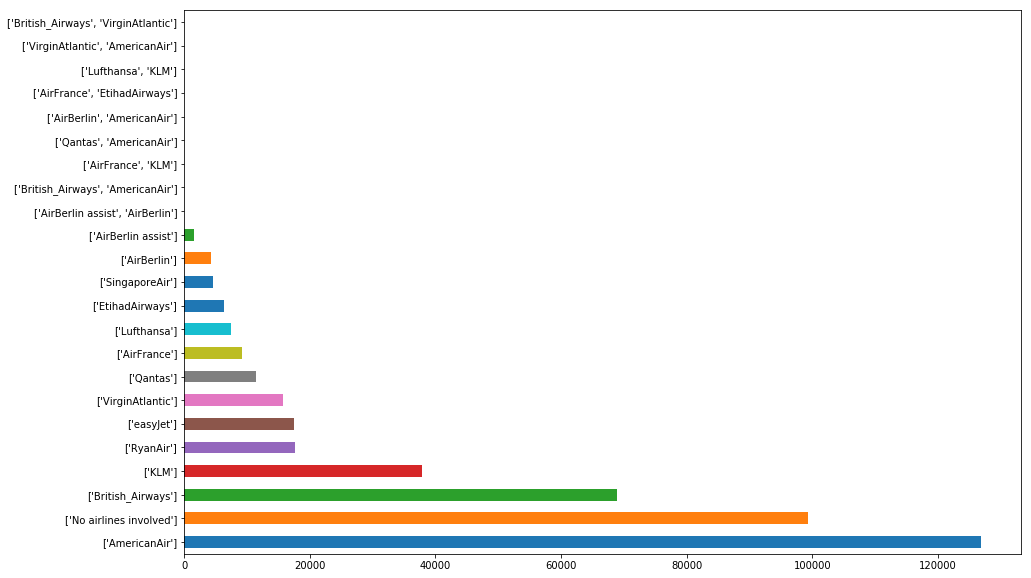

In [46]:
df['airlines_involved'].value_counts().plot(kind='barh', figsize=(15,10))

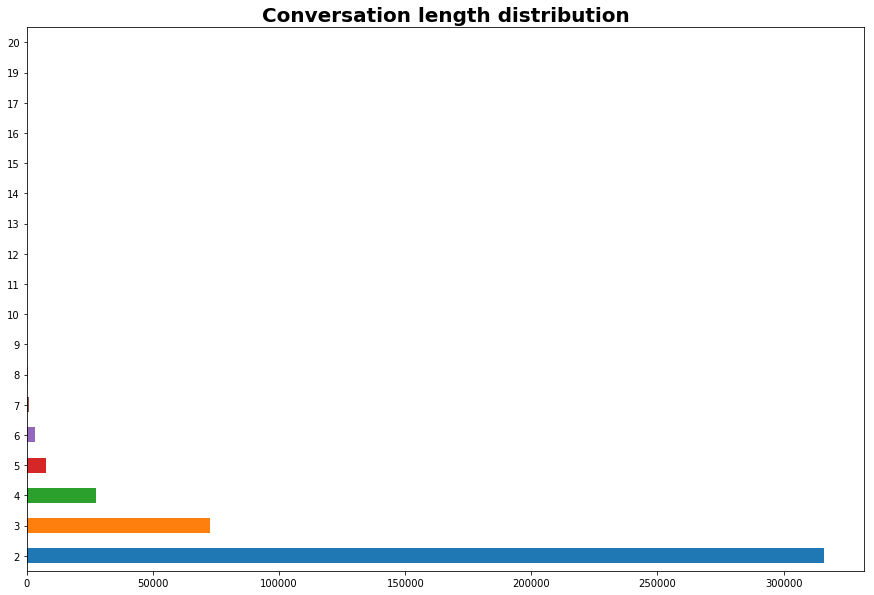

In [79]:
df['conversation_length'].value_counts().sort_index().plot(kind='barh', figsize=(15,10))
plt.title('Conversation length distribution', weight='bold', fontsize=20);

## Check long conversations

In [68]:
long_conv = df[df['conversation_length'] == 20]

In [72]:
long_conv_user_ids = eval(long_conv['user_ids'].values[1])
long_conv_tweet_ids = eval(long_conv['tweet_ids'].values[1])

In [74]:
long_conv.head()

,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved
192752,458417,"[(781120814590681088, 242747093), (78112054383...",20,"[781108878918426624, 781110422476824576, 78111...","[242747093, 242747093, 242747093, 242747093, 2...",['No airlines involved']
293673,719667,"[(800121958197329920, 42341428), (800107205894...",20,"[799981590357114880, 799985021129986048, 80001...","[42341428, 22536055, 42341428, 22536055, 42341...",['AmericanAir']


In [76]:
long_conv_text = conv_df[conv_df['id_str'].isin([str(tweet) for tweet in long_conv_tweet_ids])]['text'].values
print('Example conversation:')
i = 1
for tweet in long_conv_text:
    print(f'Tweet {i}: {tweet}')
    i+=1

Example conversation:
Tweet 1: @AmericanAir you've been saying the same since yesterday and nothing.
Tweet 2: @cdroppe We've sent additional emails to our airport Baggage teams on your behalf, and we'll let you know as soon as we hear from them.
Tweet 3: @AmericanAir still no news.
Tweet 4: @cdroppe Once we get a response from our bag team someone will contact you directly.
Tweet 5: @AmericanAir still waiting...
Tweet 6: @cdroppe Our apologies for the wait. We're still waiting as well for an update.
Tweet 7: @AmericanAir still nothing. I keep calling and still nobody seems to know whether it is in Miami or Houston... And you tell me to wait.
Tweet 8: @AmericanAir when can I get a straight answer? I can't believe it takes so long.
Tweet 9: @AmericanAir how can a company of your size doesn't know where you placed a piece of luggage!
Tweet 10: @cdroppe The bag was forwarded on AA38, connecting to AA957 last night, on expedite tag 822277. The bag should have arrived at 8:29a.
Tweet 11: @Am